My First Notebook

In [28]:
# In this project, I use IMF's World Economic Outlook Database to analyze economic perfomance of 
# different groups of countries.

import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv('IMF- WEO by group of countries.csv')
pd.set_option('display.max_columns', None)
data.head()

,WEO Country Group Code,WEO Subject Code,Country Group Name,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,Estimates Start After
0,1,NGDP_RPCH,World,"Gross domestic product, constant prices",NaN,Percent change,NaN,NaN,2.075,1.959,0.691,2.657,4.582,3.658,3.637,3.872,4.674,3.803,3.425,2.681,2.329,2.036,3.239,3.359,3.922,4.01,2.578,3.546,4.798,2.456,2.898,4.261,5.422,4.854,5.406,5.56,3.099,-0.083,5.437,4.279,3.54,3.43,3.535,3.441,3.265,3.768,3.607,2.807,-2.953,6.021,3.192,2.655,3.183,3.355,3.341,3.248,NaN
1,1,NGDP_RPCHMK,World,"Gross domestic product, constant prices",NaN,Percent change (market exchange rates),NaN,NaN,1.646,2.004,0.462,2.798,4.828,3.686,3.383,3.755,4.578,3.805,3.145,1.971,2.536,1.415,3.162,2.923,3.339,3.5,2.339,3.161,4.219,1.674,1.896,2.862,4.033,3.56,3.943,3.836,1.601,-2.01,4.179,3.082,2.492,2.609,2.833,2.843,2.624,3.288,3.188,2.485,-3.361,5.781,2.871,2.147,2.627,2.88,2.891,2.786,NaN
2,1,NGDPD,World,"Gross domestic product, current prices",NaN,U.S. dollars,Billions,NaN,"11,238.27","11,498.28","11,286.62","11,589.05","12,001.66","12,531.04","14,776.09","17,013.02","19,131.41","20,127.80","23,663.34","24,504.03","25,339.14","26,051.09","27,998.30","31,211.51","32,079.20","31,990.92","31,835.02","32,960.33","34,053.08","33,801.01","34,915.51","39,210.20","44,134.37","47,811.37","51,783.27","58,461.91","64,162.47","60,782.12","66,484.53","73,773.48","75,196.67","77,365.52","79,429.02","74,944.46","76,211.25","81,036.15","86,209.63","87,654.34","85,440.67","97,076.28","101,560.90","106,181.92","111,882.43","118,042.55","124,648.36","131,630.73",NaN
3,1,PPPGDP,World,"Gross domestic product, current prices",NaN,Purchasing power parity; international dollars,Billions,NaN,"13,400.21","14,930.38","15,909.30","16,934.33","18,321.23","19,579.82","20,669.48","21,981.84","23,788.83","25,630.20","27,659.31","29,295.59","33,270.15","34,719.28","36,509.06","38,640.04","40,857.98","43,242.68","44,926.54","47,125.48","50,498.20","52,878.46","55,218.31","58,589.63","63,335.22","68,426.92","74,266.03","80,392.86","84,371.97","84,583.96","90,151.34","95,701.82","100,691.80","105,648.96","109,595.08","111,857.08","116,168.54","122,351.47","129,708.97","135,641.45","132,936.14","146,607.92","161,449.51","171,548.57","180,655.43","190,126.13","200,153.60","210,591.31",NaN
4,1,NGDP_D,World,"Gross domestic product, deflator",NaN,"Index, 2000=100",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# coutry groups in the database

data['Country Group Name'].value_counts()

# Looking at the data, I am curios to know the relationship between GDP growth and inflation in 
  # 'advanced economies' as well as in 'emerging market and developing economies'

World                                                                       128
Advanced economies                                                          128
Euro area                                                                   128
Major advanced economies (G7)                                               128
Other advanced economies (Advanced economies excluding G7 and euro area)    128
European Union                                                              128
Emerging market and developing economies                                    128
Emerging and developing Asia                                                128
Emerging and developing Europe                                              128
ASEAN-5                                                                     128
Latin America and the Caribbean                                             128
Middle East and Central Asia                                                128
Sub-Saharan Africa                      

In [31]:
# filtering the dataset for countries with advanced economies

advanced_economies = data[data['Country Group Name'] == 'Advanced economies']
advanced_economies.set_index('Subject Descriptor', inplace=True)
advanced_economies = advanced_economies.T
advanced_economies = advanced_economies.loc['1980':'2027']
advanced_economies.head()

Subject Descriptor,"Gross domestic product, constant prices","Gross domestic product, constant prices","Gross domestic product, current prices","Gross domestic product, current prices","Gross domestic product, deflator","Gross domestic product per capita, constant prices","Gross domestic product per capita, current prices",Output gap,Gross domestic product based on purchasing-power-parity (PPP) share of world total,Investment,Gross national savings,"Inflation, average consumer prices","Inflation, end of period consumer prices",Trade volume of goods and services,Volume of imports of goods and services,Volume of imports of goods,Volume of exports of goods and services,Volume of exports of goods,Terms of trade of goods and services,Terms of trade of goods,Export price of manufactures,Export price of manufactures,Unemployment rate,Employment,General government revenue,General government total expenditure,General government net lending/borrowing,General government structural balance,General government primary net lending/borrowing,General government net debt,General government gross debt,Current account balance,Current account balance,Imports of goods and services,Exports of goods and services,Financial account balance,"Direct investment, net","Portfolio investment, net","Financial derivatives, net","Other investment, net",Change in reserves,"External debt, total","External debt, total","External debt, total","External debt, total debt service","External debt, total debt service","External debt, total debt service","External debt, total debt service, interest","External debt, total debt service, interest","External debt, total debt service, interest","External debt, total debt service, amortization","External debt, total debt service, amortization","External debt, total debt service, amortization",Commodity Price Index includes both Fuel and Non-Fuel Price Indices,Commodity Non-Fuel Price Index includes Food and Beverages and Industrial Inputs Price Indices,Commodity Industrial Inputs Price Index includes Agricultural Raw Materials and Metals Price Indices,"Crude Oil (petroleum), simple average of three spot prices; Dated Brent, West Texas Intermediate, and the Dubai Fateh, US$ per barrel","Crude Oil (petroleum), Dated Brent, light blend 38 API, fob U.K., US$ per barrel","Oil; Dubai, medium, Fateh 32 API, fob Dubai Crude Oil (petroleum), Dubai Fateh Fateh 32 API, US$ per barrel","Crude Oil (petroleum), West Texas Intermediate 40 API, Midland Texas, US$ per barrel","Commodity Fuel (energy) Index includes Crude oil (petroleum), Natural Gas, and Coal Price Indices","Crude Oil (petroleum), Price index simple average of three spot prices (APSP); Dated Brent, West Texas Intermediate, and the Dubai Fateh","Commodity Natural Gas Price Index includes European, Japanese, and American Natural Gas Price Indices","Natural Gas, Russian Natural Gas border price in Germany, US$ per million metric British thermal units of gas","Natural Gas, Indonesian Liquified Natural Gas in Japan, US$ per million metric British thermal units of liquid","Natural Gas, Natural Gas spot price at the Henry Hub terminal in Louisiana, US$ per million metric British thermal units of gas",Commodity Coal Price Index includes Australian and South African Coal,"Coal, Australian thermal coal, 1200- btu/pound, less than 1% sulfur, 14% ash, FOB Newcastle/Port Kembla, US$ per metric tonne","Coal, South African export price, US$ per metric tonne",Commodity Food and Beverage Price Index includes Food and Beverage Price Indices,"Commodity Food Price Index includes Cereal, Vegetable Oils, Meat, Seafood, Sugar, Bananas, and Oranges Price Indices","Commodity Cereals Price Index includes Wheat, Maize (Corn), Rice, and Barley","Wheat, No.1 Hard Red Winter, ordinary protein, FOB Gulf of Mexico, US$ per metric tonne","Maize (corn), U.S. No.2 Yellow, FOB Gulf of Mexico, U.S. price, US$ per metric tonne","Rice, 5 percent broken milled white rice, Thailand nominal price quote, US$ per metric

In [32]:
# preparing dataset for the analysis

advanced_economies_GDP = advanced_economies['Gross domestic product per capita, constant prices']
advanced_economies_GDP = np.asarray(advanced_economies_GDP)
advanced_economies_GDP = np.array([float(x.replace(',', '')) for x in advanced_economies_GDP])
advanced_economies_GDP = advanced_economies_GDP.astype('float64')

advanced_economies_inflation = advanced_economies['Inflation, average consumer prices']
advanced_economies_inflation = np.asarray(advanced_economies_inflation)
advanced_economies_inflation = np.array([float(x.replace(',', '')) for x in advanced_economies_inflation])
advanced_economies_inflation = advanced_economies_inflation.astype('float64')

print(advanced_economies_GDP.dtype)
print(advanced_economies_inflation.dtype)



float64
float64


In [33]:
# I want to see if changes in inflation affect GDPs in advanced economies.
 # dependent variable (GDP), independent variable (inflation)


advanced_economies_inflation_constnt = sm.add_constant(advanced_economies_inflation)
model = sm.OLS(advanced_economies_GDP, advanced_economies_inflation_constnt)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     24.97
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           8.89e-06
Time:                        11:29:41   Log-Likelihood:                -493.87
No. Observations:                  48   AIC:                             991.7
Df Residuals:                      46   BIC:                             995.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.848e+04   1671.435     29.005      0.000    4.51e+04    5.18e+04
x1         -2039.5569    408.183     -4.997      0.000   -2861.187   -1217.927
==============================================================================
Omnibus:                        2.830   Durbin-Watson:                   0.191
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                2.618
Skew:                           0.557   Prob(JB):                        0.270
Kurtosis:                       2.735   Cond. No.                         6.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# The model is indicative of a negative relationship between inflation and GDP per capita
# One unit change in inflation is associated with - 2039 change in GDP per capita
# The result is statistically significant. The explanatory power of model is 
# good, but not strong with Adj R-squared of 0.33.

# Below, I visualize this relationship.

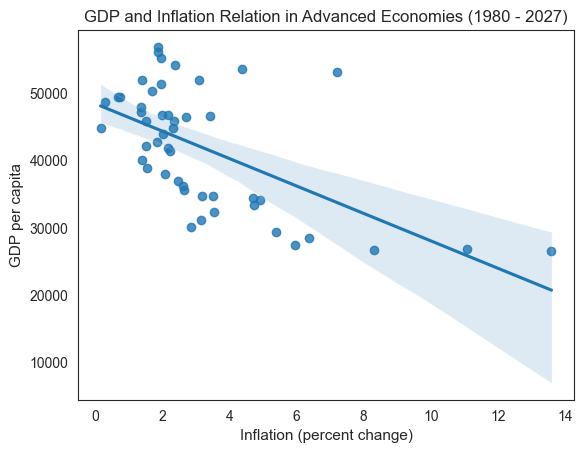

In [35]:
advanced_economies_GDP = advanced_economies_GDP.ravel()
advanced_economies_inflation = advanced_economies_inflation.ravel()

figure = sns.regplot(x=advanced_economies_inflation, y=advanced_economies_GDP, data = advanced_economies)

plt.title('GDP and Inflation Relation in Advanced Economies (1980 - 2027)', fontsize = 12)
plt.xlabel('Inflation (percent change)', fontsize = 11)
plt.ylabel('GDP per capita', fontsize = 11)
sns.set_style('darkgrid')

plt.show()

In [36]:
# Now I wanted to check if this relationship could be affected by some ommitted variables
# I am curios to know if controlling for unemployment and changes in reserve can affect the outcome of model


advanced_economies_unemployment = advanced_economies['Unemployment rate']
advanced_economies_unemployment = np.asarray(advanced_economies_unemployment)
advanced_economies_unemployment = np.array([float(x.replace(',', '')) for x in advanced_economies_unemployment])
advanced_economies_unemployment = advanced_economies_unemployment.astype('float64')

advanced_economies_change_in_reserve = advanced_economies['Change in reserves']
advanced_economies_change_in_reserve = np.asarray(advanced_economies_change_in_reserve)
advanced_economies_change_in_reserve = np.array([float(x.replace(',', '')) for x in advanced_economies_change_in_reserve])
advanced_economies_change_in_reserve = advanced_economies_change_in_reserve.astype('float64')

print(len(advanced_economies_unemployment))
print(len(advanced_economies_change_in_reserve))
print(len(advanced_economies_inflation))

print(advanced_economies_unemployment.dtype)
print(advanced_economies_change_in_reserve.dtype)
print(advanced_economies_inflation.dtype)



48
48
48
float64
float64
float64


In [37]:

predictor_variables = np.column_stack([advanced_economies_inflation, 
                                       advanced_economies_unemployment, 
                                       advanced_economies_change_in_reserve])

predictor_variables = sm.add_constant(predictor_variables)

model_two = sm.OLS(advanced_economies_GDP, predictor_variables)
results_two = model_two.fit()

results_two.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     48.15
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           5.99e-14
Time:                        11:29:42   Log-Likelihood:                -469.37
No. Observations:                  48   AIC:                             946.7
Df Residuals:                      44   BIC:                             954.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.799e+04   4455.872     17.503      0.000     6.9e+04     8.7e+04
x1         -1600.0678    283.698     -5.640      0.000   -2171.823   -1028.312
x2         -5277.1963    655.917     -8.046      0.000   -6599.110   -3955.282
x3            25.8657      5.621      4.602      0.000      14.538      37.193
==============================================================================
Omnibus:                        0.754   Durbin-Watson:                   0.751
Prob(Omnibus):                  0.686   Jarque-Bera (JB):                0.555
Skew:                           0.261   Prob(JB):                        0.758
Kurtosis:                       2.922   Cond. No.                     1.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# It looks like the first model suffers from omitting two other varialbes(unemployment & changes in reserve)
# The fit of Mode_Two is much better than the first model with Adj. R-squared of 0.751.
# The results are statistically significant
# When accounting for unemployment & changes in reserve, the impact of inflation on GDP decreases significantly.

In [39]:
# Now, I want to do the same process for emerging markets and developing countries
# filtering the dataset for this purpose

developing_economies = data[data['Country Group Name'] == 'Emerging market and developing economies']
developing_economies.set_index('Subject Descriptor', inplace=True)
developing_economies = developing_economies.T
developing_economies = developing_economies.loc['1980':'2027']
developing_economies.head()

Subject Descriptor,"Gross domestic product, constant prices","Gross domestic product, constant prices","Gross domestic product, current prices","Gross domestic product, current prices","Gross domestic product, deflator","Gross domestic product per capita, constant prices","Gross domestic product per capita, current prices",Output gap,Gross domestic product based on purchasing-power-parity (PPP) share of world total,Investment,Gross national savings,"Inflation, average consumer prices","Inflation, end of period consumer prices",Trade volume of goods and services,Volume of imports of goods and services,Volume of imports of goods,Volume of exports of goods and services,Volume of exports of goods,Terms of trade of goods and services,Terms of trade of goods,Export price of manufactures,Export price of manufactures,Unemployment rate,Employment,General government revenue,General government total expenditure,General government net lending/borrowing,General government structural balance,General government primary net lending/borrowing,General government net debt,General government gross debt,Current account balance,Current account balance,Imports of goods and services,Exports of goods and services,Financial account balance,"Direct investment, net","Portfolio investment, net","Financial derivatives, net","Other investment, net",Change in reserves,"External debt, total","External debt, total","External debt, total","External debt, total debt service","External debt, total debt service","External debt, total debt service","External debt, total debt service, interest","External debt, total debt service, interest","External debt, total debt service, interest","External debt, total debt service, amortization","External debt, total debt service, amortization","External debt, total debt service, amortization",Commodity Price Index includes both Fuel and Non-Fuel Price Indices,Commodity Non-Fuel Price Index includes Food and Beverages and Industrial Inputs Price Indices,Commodity Industrial Inputs Price Index includes Agricultural Raw Materials and Metals Price Indices,"Crude Oil (petroleum), simple average of three spot prices; Dated Brent, West Texas Intermediate, and the Dubai Fateh, US$ per barrel","Crude Oil (petroleum), Dated Brent, light blend 38 API, fob U.K., US$ per barrel","Oil; Dubai, medium, Fateh 32 API, fob Dubai Crude Oil (petroleum), Dubai Fateh Fateh 32 API, US$ per barrel","Crude Oil (petroleum), West Texas Intermediate 40 API, Midland Texas, US$ per barrel","Commodity Fuel (energy) Index includes Crude oil (petroleum), Natural Gas, and Coal Price Indices","Crude Oil (petroleum), Price index simple average of three spot prices (APSP); Dated Brent, West Texas Intermediate, and the Dubai Fateh","Commodity Natural Gas Price Index includes European, Japanese, and American Natural Gas Price Indices","Natural Gas, Russian Natural Gas border price in Germany, US$ per million metric British thermal units of gas","Natural Gas, Indonesian Liquified Natural Gas in Japan, US$ per million metric British thermal units of liquid","Natural Gas, Natural Gas spot price at the Henry Hub terminal in Louisiana, US$ per million metric British thermal units of gas",Commodity Coal Price Index includes Australian and South African Coal,"Coal, Australian thermal coal, 1200- btu/pound, less than 1% sulfur, 14% ash, FOB Newcastle/Port Kembla, US$ per metric tonne","Coal, South African export price, US$ per metric tonne",Commodity Food and Beverage Price Index includes Food and Beverage Price Indices,"Commodity Food Price Index includes Cereal, Vegetable Oils, Meat, Seafood, Sugar, Bananas, and Oranges Price Indices","Commodity Cereals Price Index includes Wheat, Maize (Corn), Rice, and Barley","Wheat, No.1 Hard Red Winter, ordinary protein, FOB Gulf of Mexico, US$ per metric tonne","Maize (corn), U.S. No.2 Yellow, FOB Gulf of Mexico, U.S. price, US$ per metric tonne","Rice, 5 percent broken milled white rice, Thailand nominal price quote, US$ per metric

In [40]:
# preparing dataset for regression model

developing_economies_GDP = developing_economies['Gross domestic product per capita, constant prices']
developing_economies_GDP = np.asarray(developing_economies_GDP)
developing_economies_GDP = np.array([float(x.replace(',', '')) for x in developing_economies_GDP])
developing_economies_GDP = developing_economies_GDP.astype('float64')

developing_economies_inflation = developing_economies['Inflation, average consumer prices']
developing_economies_inflation = np.asarray(developing_economies_inflation)
developing_economies_inflation = np.array([float(x.replace(',', '')) for x in developing_economies_inflation])
developing_economies_inflation = developing_economies_inflation.astype('float64')

print(developing_economies_GDP.dtype)
print(developing_economies_inflation.dtype)

float64
float64


In [41]:
# I want to see if changes in inflation affect GDPs in developing economies.
 # dependent variable (GDP), independent variable (inflation)


developing_economies_inflation_constant = sm.add_constant(developing_economies_inflation)
model_three = sm.OLS(developing_economies_GDP, developing_economies_inflation_constant)
results_three = model.fit()

results_three.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     24.97
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           8.89e-06
Time:                        11:29:42   Log-Likelihood:                -493.87
No. Observations:                  48   AIC:                             991.7
Df Residuals:                      46   BIC:                             995.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.848e+04   1671.435     29.005      0.000    4.51e+04    5.18e+04
x1         -2039.5569    408.183     -4.997      0.000   -2861.187   -1217.927
==============================================================================
Omnibus:                        2.830   Durbin-Watson:                   0.191
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                2.618
Skew:                           0.557   Prob(JB):                        0.270
Kurtosis:                       2.735   Cond. No.                         6.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Here also, the model indicates a negative relationship between inflation and GDP per capita
# The result is identical to previous model and statistically significant

# Below, I visualize this relationship.

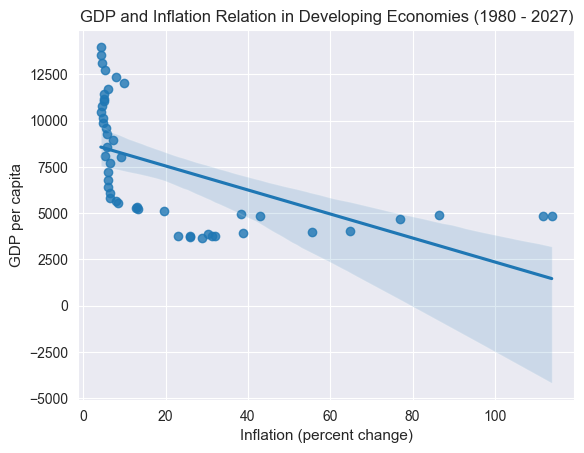

In [43]:
developing_economies_GDP = developing_economies_GDP.ravel()
developing_economies_inflation = developing_economies_inflation.ravel()

figure = sns.regplot(x=developing_economies_inflation, y=developing_economies_GDP, data = developing_economies)
sns.set_style('white')

plt.title('GDP and Inflation Relation in Developing Economies (1980 - 2027)', fontsize = 12)
plt.xlabel('Inflation (percent change)', fontsize = 11)
plt.ylabel('GDP per capita', fontsize = 11)

plt.show()

In [44]:
# Now I wanted to check if this relationship could be affected by some ommitted variables
# In this model, I am curios to know if controlling for savings and changes in reserve
# can affect the outcome

In [45]:
# preparing data for analysis

developing_economies_savings = developing_economies['Gross national savings']
developing_economies_savings = [float(x.replace(',', '')) if type(x) == str else x for x in developing_economies_savings]
developing_economies_savings = np.asarray(developing_economies_savings, dtype='float64')

developing_economies_change_in_reserve = developing_economies['Change in reserves']
developing_economies_change_in_reserve = [float(x.replace(',', '')) if type(x) == str else x for x in developing_economies_change_in_reserve]
developing_economies_change_in_reserve = np.asarray(developing_economies_change_in_reserve, dtype='float64')

print(developing_economies_savings.dtype)
print(developing_economies_change_in_reserve.dtype)
print(developing_economies_inflation.dtype)

print(np.isnan(developing_economies_savings).sum())
print(np.isnan(developing_economies_change_in_reserve).sum())
print(np.isnan(developing_economies_inflation).sum())



float64
float64
float64
0
16
0


In [46]:
# There null values in one variable. I replace them with the mean of the variable

developing_economies_change_in_reserve_mean = np.nanmean(developing_economies_change_in_reserve)
developing_economies_change_in_reserve = np.nan_to_num(developing_economies_change_in_reserve, 
                                                       nan=developing_economies_change_in_reserve_mean)

print(len(developing_economies_savings))
print(len(developing_economies_change_in_reserve))
print(len(developing_economies_inflation))



48
48
48


In [47]:

predictor_variables_2 = np.column_stack([developing_economies_inflation, 
                                       developing_economies_savings, 
                                       developing_economies_change_in_reserve])

predictor_variables_2 = sm.add_constant(predictor_variables_2)

model_four = sm.OLS(developing_economies_GDP, predictor_variables_2)
results_four = model_four.fit()

results_four.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     115.1
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           7.55e-21
Time:                        11:29:42   Log-Likelihood:                -403.42
No. Observations:                  48   AIC:                             814.8
Df Residuals:                      44   BIC:                             822.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9755.4611   1252.567     -7.788      0.000   -1.23e+04   -7231.078
x1             9.3332      7.760      1.203      0.236      -6.307      24.973
x2           631.6522     41.811     15.107      0.000     547.387     715.918
x3            -2.3857      0.569     -4.191      0.000      -3.533      -1.239
==============================================================================
Omnibus:                        0.154   Durbin-Watson:                   0.612
Prob(Omnibus):                  0.926   Jarque-Bera (JB):                0.098
Skew:                           0.097   Prob(JB):                        0.952
Kurtosis:                       2.892   Cond. No.                     3.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# Like the first model, the second model suffers from omitting two other varialbes(savings & changes in reserve)
# The fit of this model is much better than the first model with Adj. R-squared of 0.879.
# When accounting for savings & changes in reserve, the impact of inflation on GDP decreases drasticlly.
    # the result for inflation and GDP is not statistically significant